# 반려동물 안구질환 판정 모델

### 데이터셋 입력

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import json
import os, glob
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow import keras

In [2]:
caltech_dir = '/Users/hk/Desktop/AI/Project/dataset/pet_eyedisease/train'
categories = ['Y', 'N']
nb_classes = len(categories)

In [3]:
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
Y = []

for idx, cat in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    
    image_dir = caltech_dir + '/' + cat
    files = glob.glob(image_dir+'/*.jpg')
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((64, 64))
        data = np.asarray(img)
        
        X.append(data)
        Y.append(label)

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
train_input, val_input, train_target, val_target = train_test_split(
    X, Y, test_size=0.2)

### 모델 생성

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(nb_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_input, train_target, epochs=20,
                   validation_data=(val_input, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
24/24 [==============================] - 2s 52ms/step - loss: 21.4597 - accuracy: 0.8008 - val_loss: 0.6701 - val_accuracy: 0.5503
Epoch 2/20
24/24 [==============================] - 1s 48ms/step - loss: 0.5326 - accuracy: 0.7782 - val_loss: 0.5620 - val_accuracy: 0.7989
Epoch 3/20
24/24 [==============================] - 1s 48ms/step - loss: 0.2832 - accuracy: 0.9084 - val_loss: 0.4983 - val_accuracy: 0.7937
Epoch 4/20
24/24 [==============================] - 1s 49ms/step - loss: 0.1930 - accuracy: 0.9256 - val_loss: 0.4544 - val_accuracy: 0.8148
Epoch 5/20
24/24 [==============================] - 1s 48ms/step - loss: 0.1524 - accuracy: 0.9456 - val_loss: 0.3906 - val_accuracy: 0.8519
Epoch 6/20
24/24 [==============================] - 1s 50ms/step - loss: 0.1242 - accuracy: 0.9548 - val_loss: 0.3176 - val_accuracy: 0.8730
Epoch 7/20
24/24 [==============================] - 1s 47ms/step - loss: 0.1051 - accuracy: 0.9655 - val_loss: 0.4409 - val_accuracy: 0.7831
Epoch 8/20
2

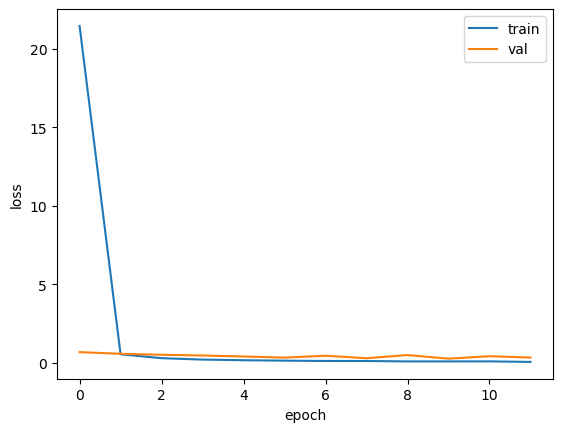

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_input, val_target)

6/6 [==============================] - 0s 9ms/step - loss: 0.2515 - accuracy: 0.9101


[0.25145119428634644, 0.9100528955459595]

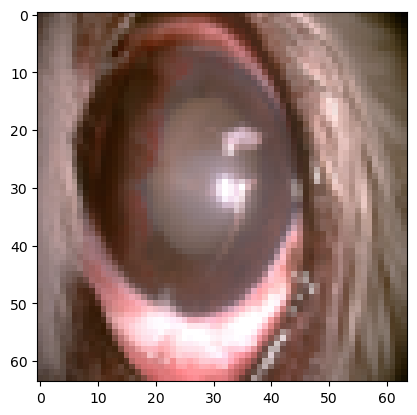

In [11]:
plt.imshow(val_input[111], cmap='gray_r')
plt.show()

In [12]:
preds = model.predict(val_input[111:112])
print(preds)

1/1 [==============================] - 0s 46ms/step
[[0.99033654 0.00966343]]


In [13]:
classes = ['Y', 'N']

print(classes[np.argmax(preds)])

Y


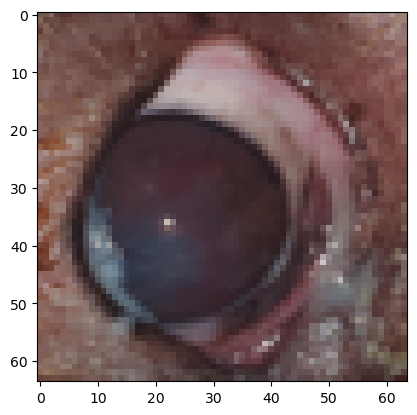

In [23]:
plt.imshow(val_input[188], cmap='gray_r')
plt.show()

In [25]:
preds = model.predict(val_input[188:189])
print(preds)

1/1 [==============================] - 0s 11ms/step
[[0.08523372 0.91476625]]


In [26]:
print(classes[np.argmax(preds)])

N
